<a href="https://colab.research.google.com/github/serantux/growattRS232/blob/master/TP1_Balbuena_Serrantes_Fonnegra_Velazquez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mentoría: "Predicción de lluvias extremas"

- Grupo 1:
  - Florencia Balbuena
  - Sebastián Serantes
  - Diana Fonnegra
  - Laura Velazquez

# Desarrolo del TP-1: Análisis y Visualización de Datos

## 0 a) Importación de librerías:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm
import statsmodels.api as sm
sns.set_theme(style="darkgrid")
sns.set_context("notebook", font_scale=1.25)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Links útiles (ordenados de simples a complejos):

https://towardsdatascience.com/time-series-analysis-for-machine-learning-with-python-626bee0d0205

https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/

https://towardsdatascience.com/playing-with-time-series-data-in-python-959e2485bff8

## 0 b) Lectura y carga de datos:

In [ ]:
ruta = 'https://raw.githubusercontent.com/Rondamon/2022_Mentoria_LluviasExtremas/master/dataset/'
Datos = pd.read_csv(ruta + "/datos_diarios_cordoba.csv", parse_dates = True, index_col="fecha")
id_Datos = pd.read_csv(ruta + "metadatos_estaciones.csv")

In [ ]:
pd.options.display.float_format = '{:.2f}'.format

## 0 c) Previsualización de datos:

In [ ]:
Datos.describe().T

,count,mean,std,min,25%,50%,75%,max
id,249627.00,124814.00,72061.25,1.00,62407.50,124814.00,187220.50,249627.00
omm_id,249627.00,1010553.16,2899695.76,1.00,87328.00,87349.00,87467.00,9987015.00
helio,171930.00,7.08,3.85,0.00,4.30,8.10,10.00,19.10
hr,202229.00,67.17,15.47,7.00,57.00,68.00,79.00,100.00
nub,168343.00,3.70,2.62,0.00,1.00,4.00,6.00,8.00
prcp,232801.00,2.29,8.32,0.00,0.00,0.00,0.00,240.00
pres_est,166202.00,973.36,18.05,927.40,960.50,970.10,988.00,1026.70
pres_nm,130758.00,1013.79,6.51,989.90,1009.20,1013.30,1017.80,1042.60
td,202279.00,10.59,6.67,-17.60,5.80,11.40,15.90,30.50
tmax,205391.00,24.40,6.54,-0.40,19.60,24.80,29.40,45.10


In [ ]:
Datos.head(5)

,id,omm_id,helio,hr,nub,prcp,pres_est,pres_nm,td,tmax,tmed,tmin,vmax_d,vmax_f,vmed,caudal
fecha,,,,,,,,,,,,,,,,
1961-01-01,1,87244,NaN,62.00,0.00,0.00,965.90,NaN,15.90,32.30,25.10,13.50,NaN,NaN,1.00,NaN
1961-01-02,2,87244,NaN,66.00,6.00,28.00,969.90,NaN,15.50,27.50,22.20,18.30,NaN,NaN,1.00,NaN
1961-01-03,3,87244,NaN,92.00,8.00,15.40,972.60,NaN,13.10,21.70,14.40,12.90,NaN,NaN,4.50,NaN
1961-01-04,4,87244,NaN,84.00,5.00,0.00,969.60,NaN,17.40,23.10,20.40,13.90,NaN,NaN,0.30,NaN
1961-01-05,5,87244,NaN,84.00,5.00,3.60,965.60,NaN,17.80,23.90,20.70,15.50,NaN,NaN,1.50,NaN


In [ ]:
Datos.tail(5)

,id,omm_id,helio,hr,nub,prcp,pres_est,pres_nm,td,tmax,tmed,tmin,vmax_d,vmax_f,vmed,caudal
fecha,,,,,,,,,,,,,,,,
2017-08-29,249623,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.50
2017-08-30,249624,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.94
2017-08-31,249625,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.33
2017-09-01,249626,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.73
2017-09-02,249627,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.24


# Descripción de datasets:

  - **id_Datos:** contiene todos los datos de ubicación (latitud, longitud, altura, provincia, departamento (adm2), etc) de las estaciones en la provincia de Córdoba que iremos a analizar. Estos se vinculan con la tabla "Datos" mediante la columna "omm_id" que es el número de id segun la Organización Meteorológica Mundial.

  - **Datos:** contiene los datos meteorologicos registrados para cada estación de la OMM. Los datos son los siguientes:
      - helio: horas diarias del sol (horas).
      - hr: humedad relativa (%).
      - nub: cobertura nubosa (octavos).
      - prcp: precipitación acumulada (milímetros "mm").
      - pres_est: presión al nivel de la estación (hectopascales "hpa").
      - pres_nm: presión al nivel del mar (hectopascales "hpa").
      - td: temperatura de rocio (Grados Celsius).
      - tmax: temperatura máxima (Grados Celsius).
      - tmed: temperatura media (Grados Celsius).
      - tmin: temperatura mínima (Grados Celsius).
      - vmax_d: dirección del viento máximo (decenas de grado).
      - vmax_f: velocidad del viento máxima (metros por segundo "m/s").
      - vmed: velocidad del viento media (metros por segundo "m/s").
      - caudal: caudal que escurre por el rio (solo algunas estaciones tienen esta informacion, en metros cúbicos por segundo "m3/s").

 

In [ ]:
id_Datos[:3]

,id,omm_id,nombre,lon_grad,lon_min,lon_seg,lon_hem,lat_grad,lat_min,lat_seg,...,lon_dec,lat_dec,elev,institucion_id,nivel_adm1,nivel_adm2,fecha_inicio,tipo,pais_id,siglas
0,1,87244,Villa Maria del Rio Seco,63,43,39.31,W,29,54,20.90,...,-63.73,-29.91,341,1,Cordoba,Rio Seco,1/10/1903,C,AR,SMN
1,2,87328,Villa Dolores Aero,65,8,56.54,W,31,57,4.66,...,-65.15,-31.95,569,1,Cordoba,San Javier,1/10/1903,C,AR,SMN
2,3,87344,Cordoba Aero,64,12,42.67,W,31,17,47.87,...,-64.21,-31.30,474,1,Cordoba,Colon,1/1/1946,C,AR,SMN


## CONSIGNA:

## 1. Estadísticos descriptivos

  1. Realizar Box-Blot de cada variable para las diferentes estaciones.
  2. ¿Encuentran outliers en estas variables?
  3. Grupo M10-1: Calcular el rango de las variables de cada estación.
  4. Grupo M10-2: ¿Existen valores faltantes? Cuantificarlos.




# Desarrollo de las consignas:

## 1.1 Box-Plot-> 
Para la realización de los boxplots se ejecutaron pasos como: 
- Crear una copia del conjunto de datos de estaciones
- Definir un diccionario de datos que tome como _key_ el valor de la codificación de la OMM y como _value_ el nombre que etiqueta la misma.
- Definir un diccionario de datos que tome como _key_ el valor de la codificación de la OMM y como _value_ el dato de elevación en la que se ubica la estación.
- Gráficar en formato de Boxplot cada una de las variables que se encuentran en el conjunto de datos por estación.

In [ ]:
stations_dataset = id_Datos.copy()
dataset = Datos.copy()

stations = stations_dataset.set_index('omm_id')['nombre'].to_dict()
elevs = stations_dataset.set_index('omm_id')['elev'].to_dict()

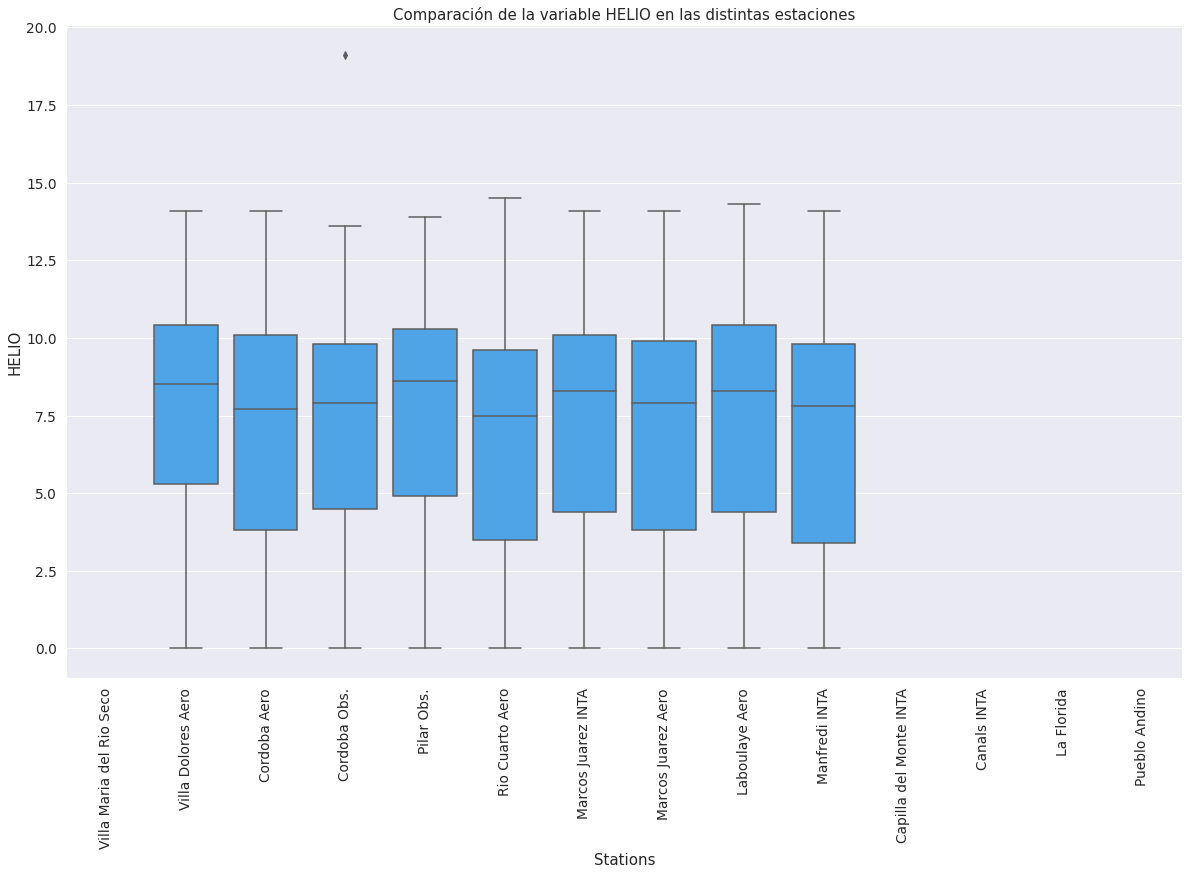

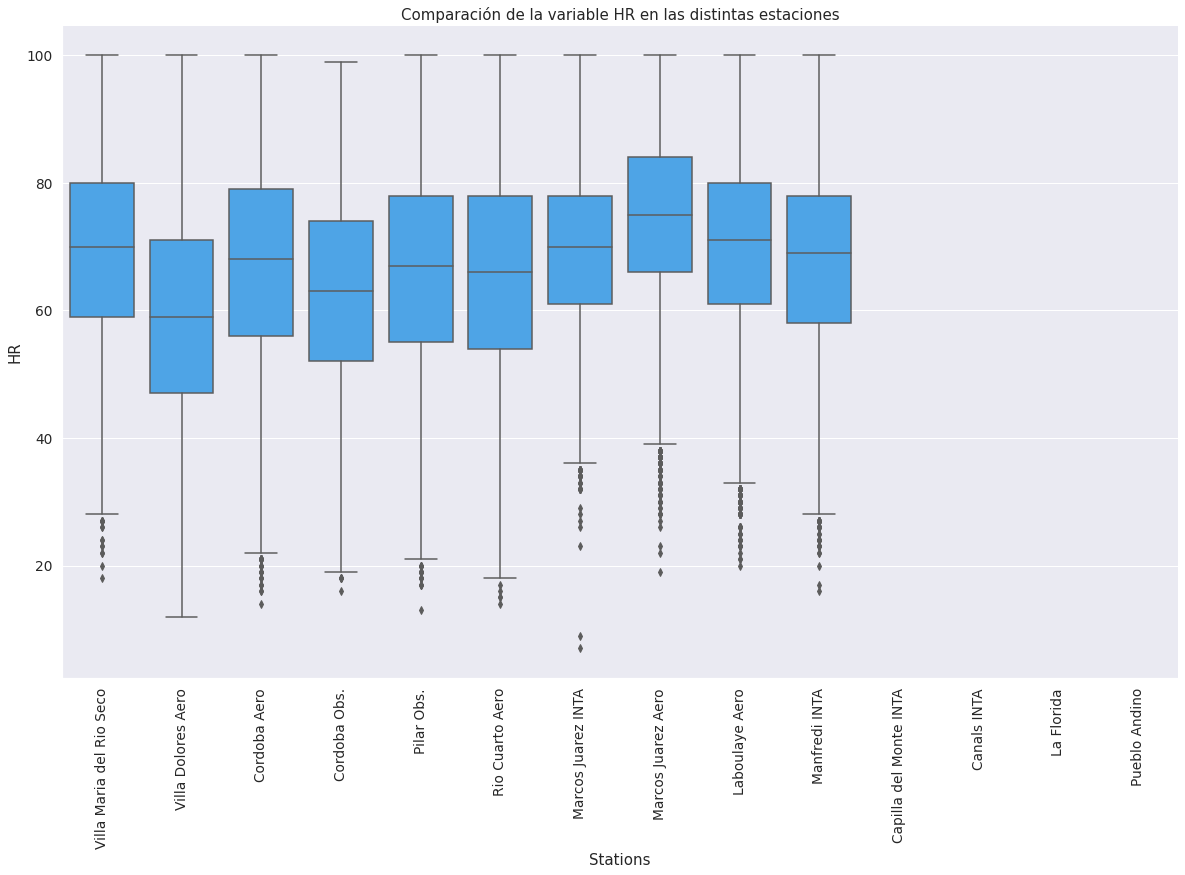

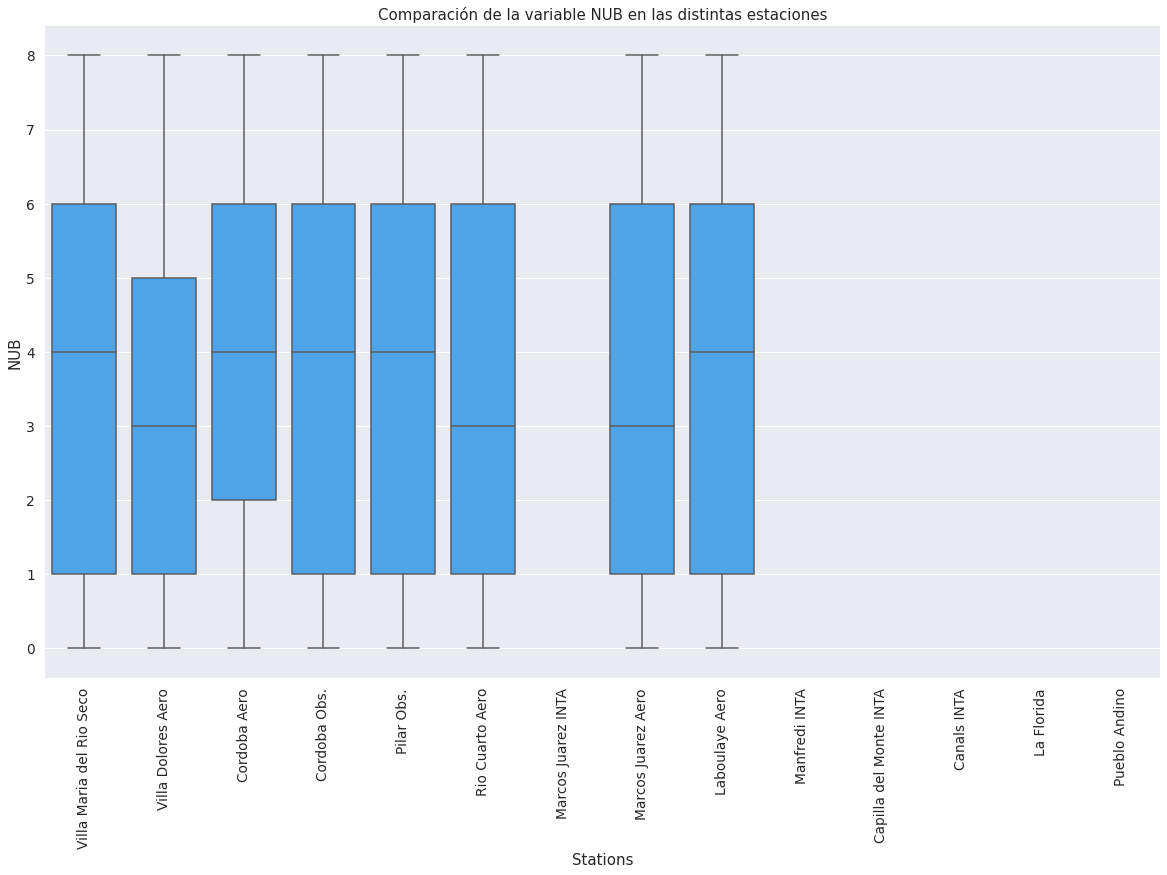

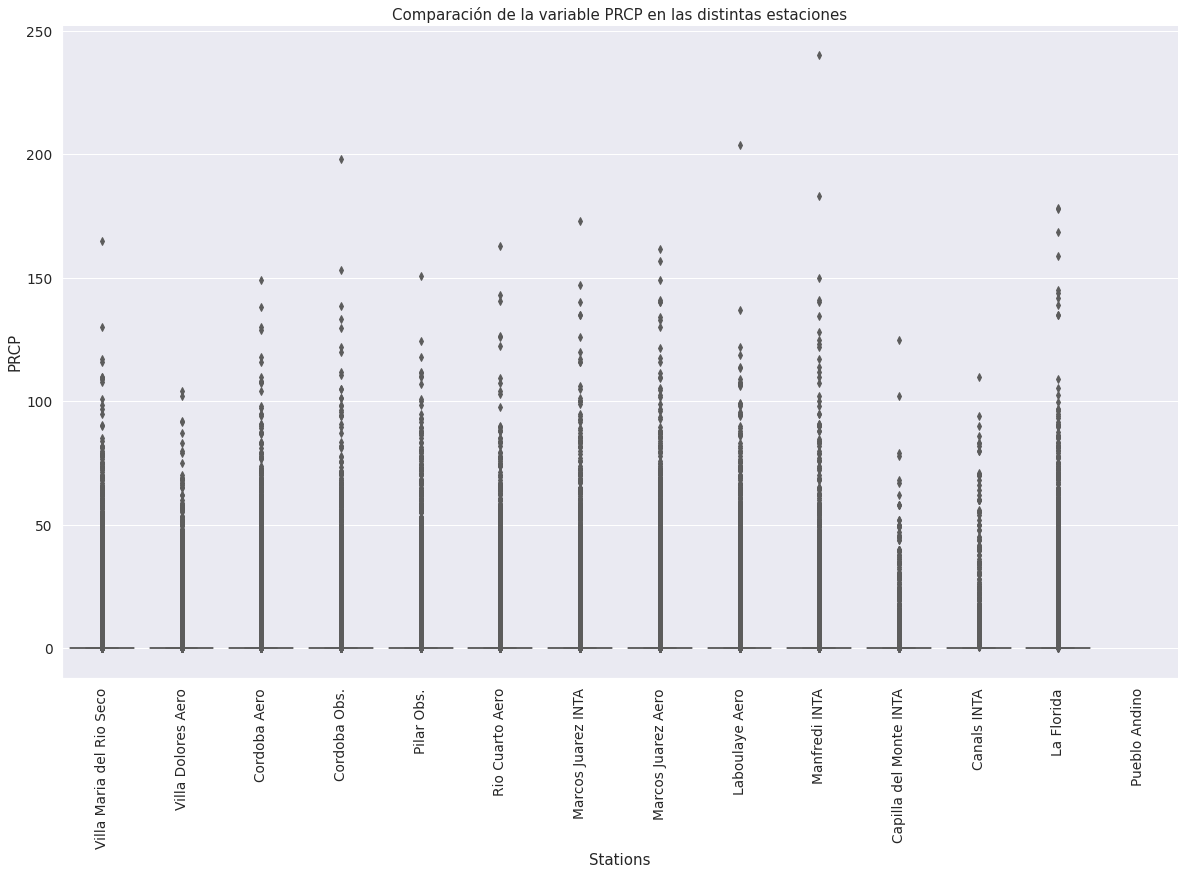

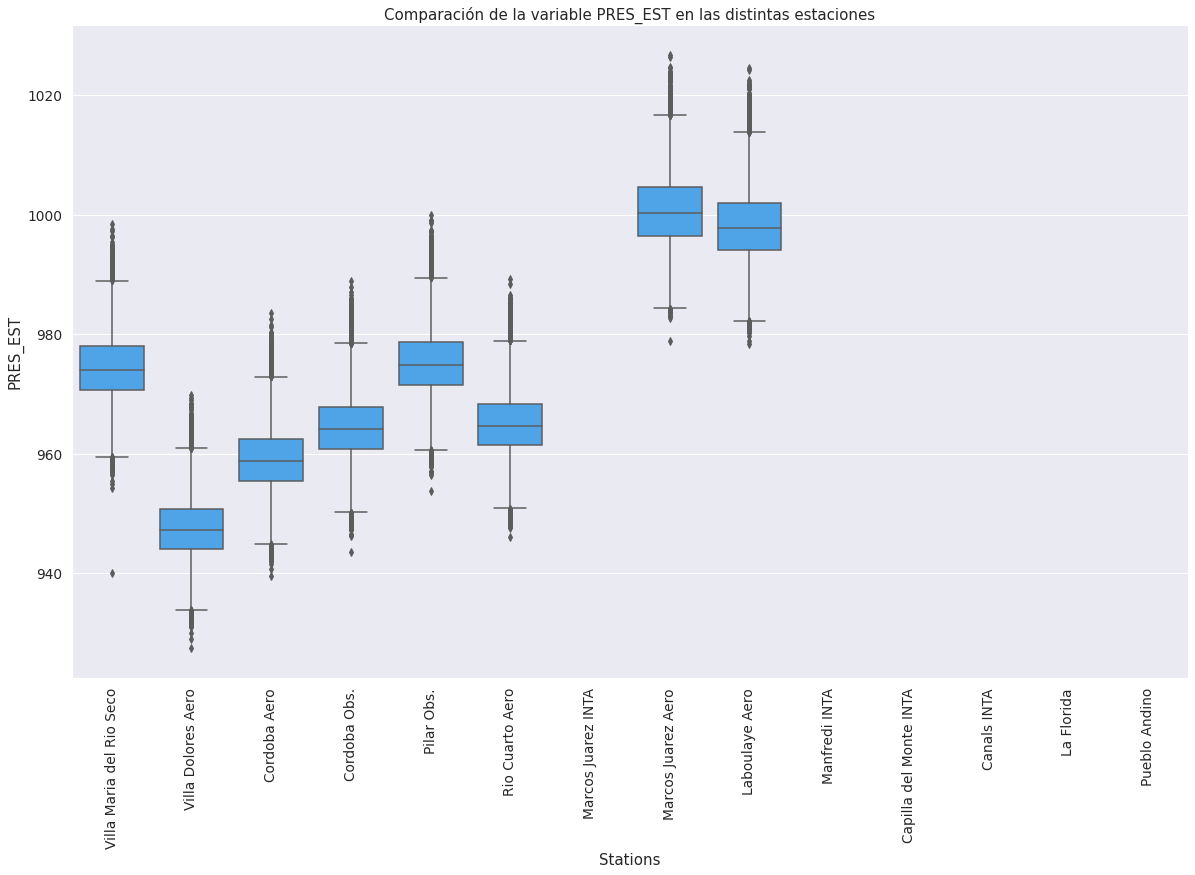

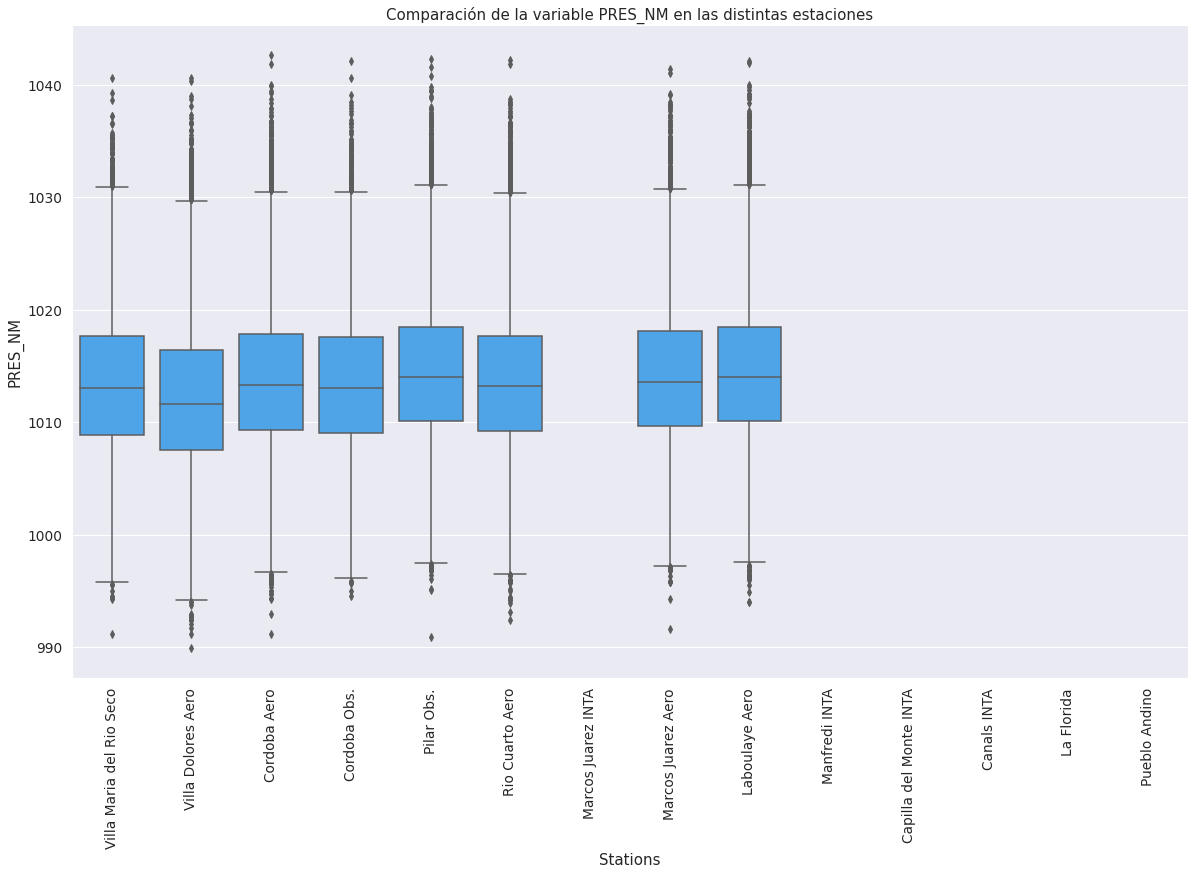

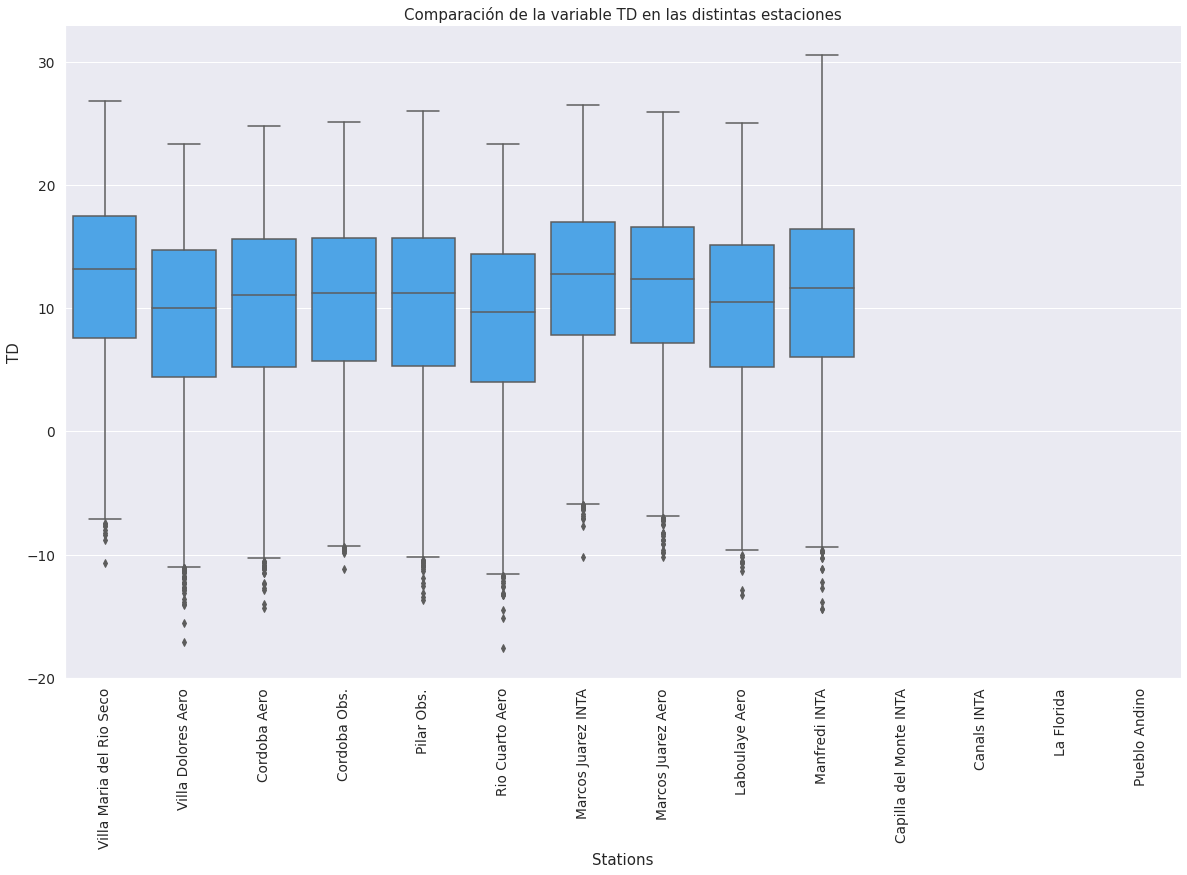

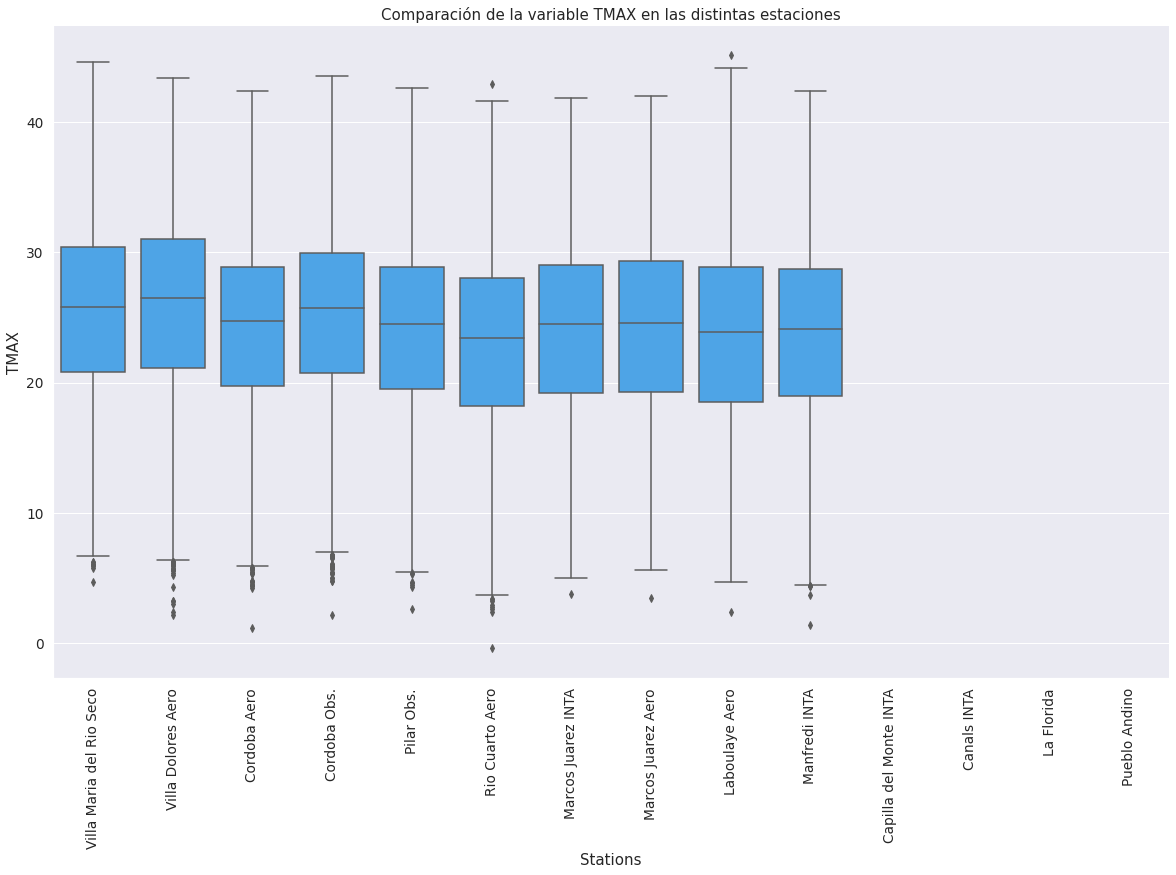

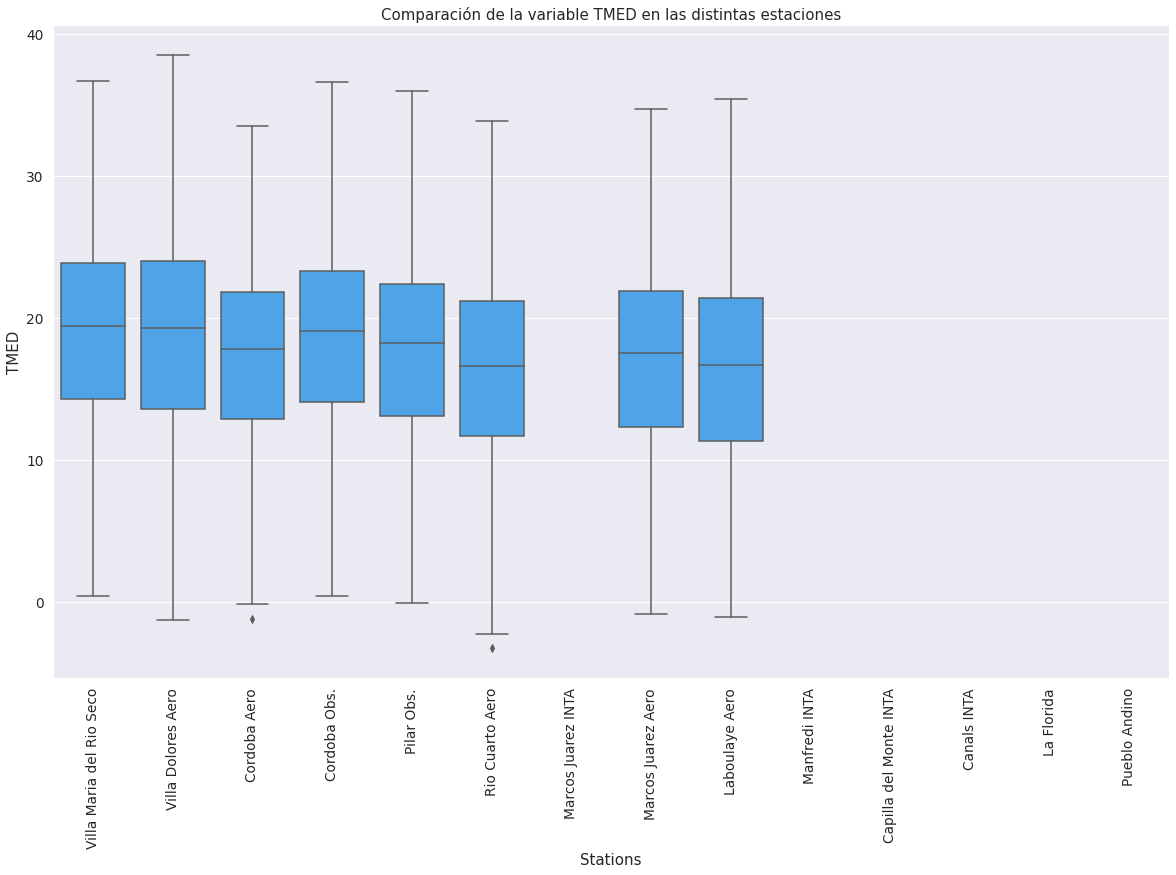

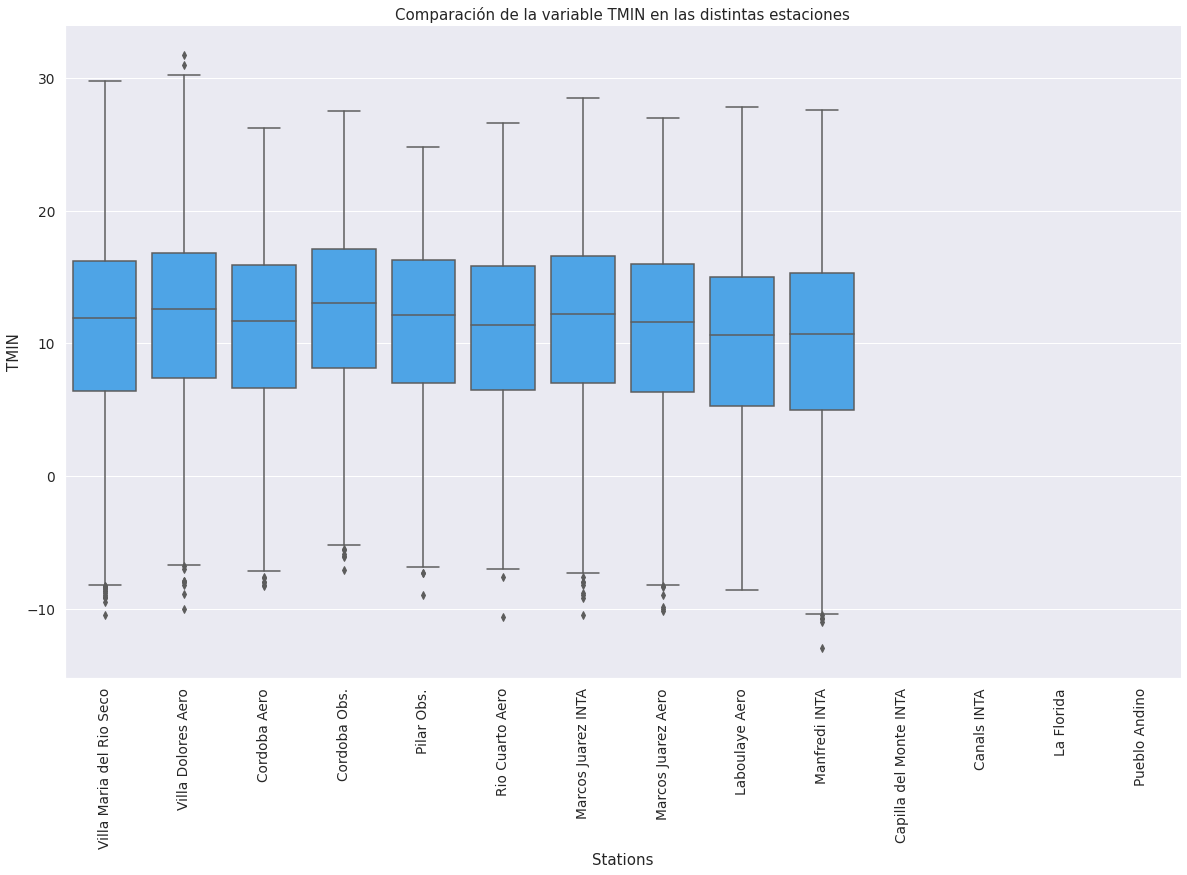

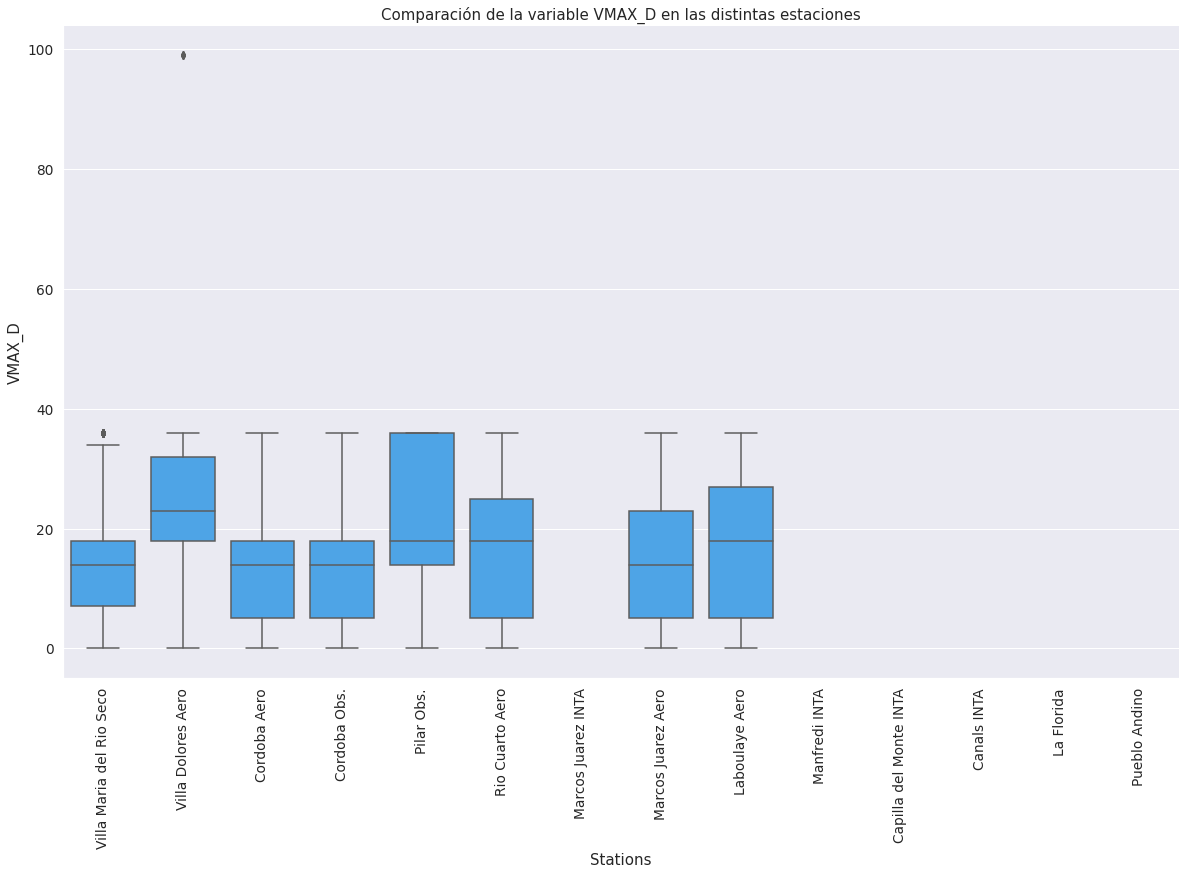

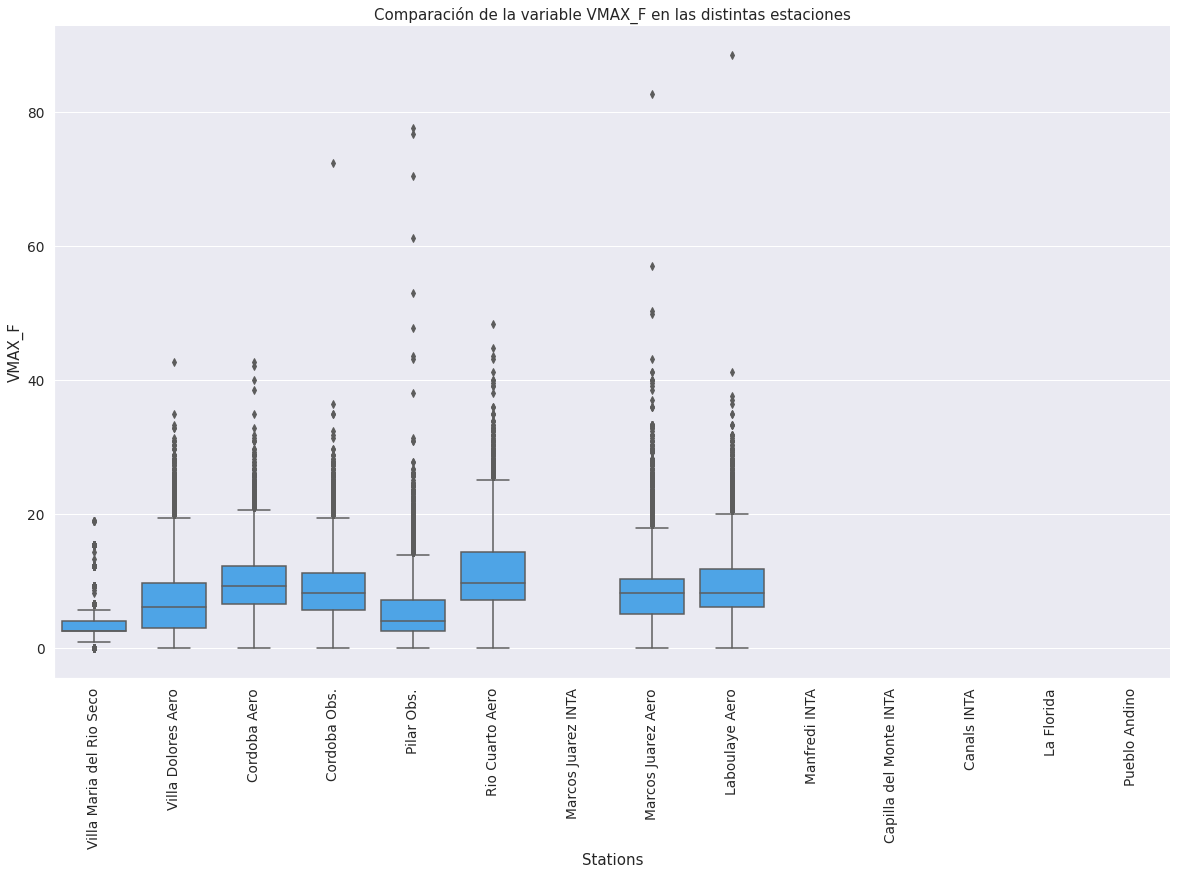

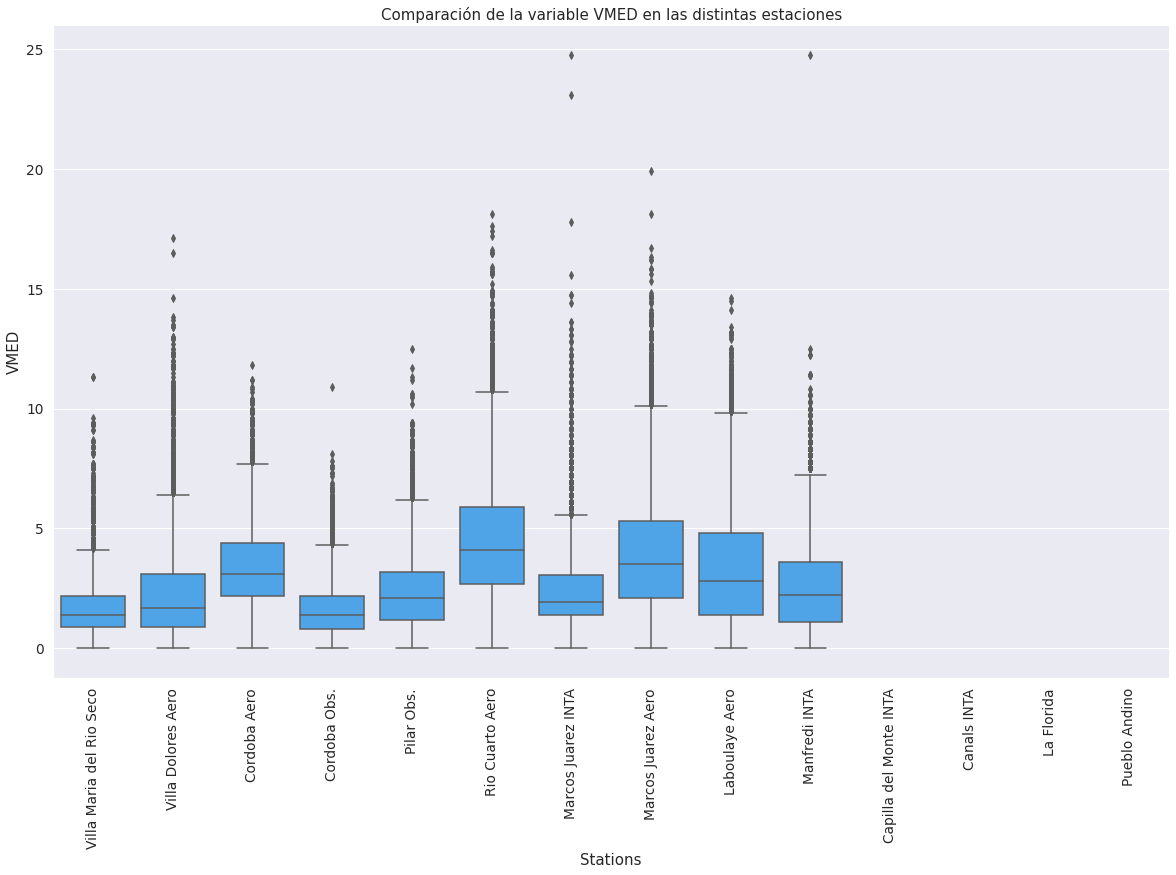

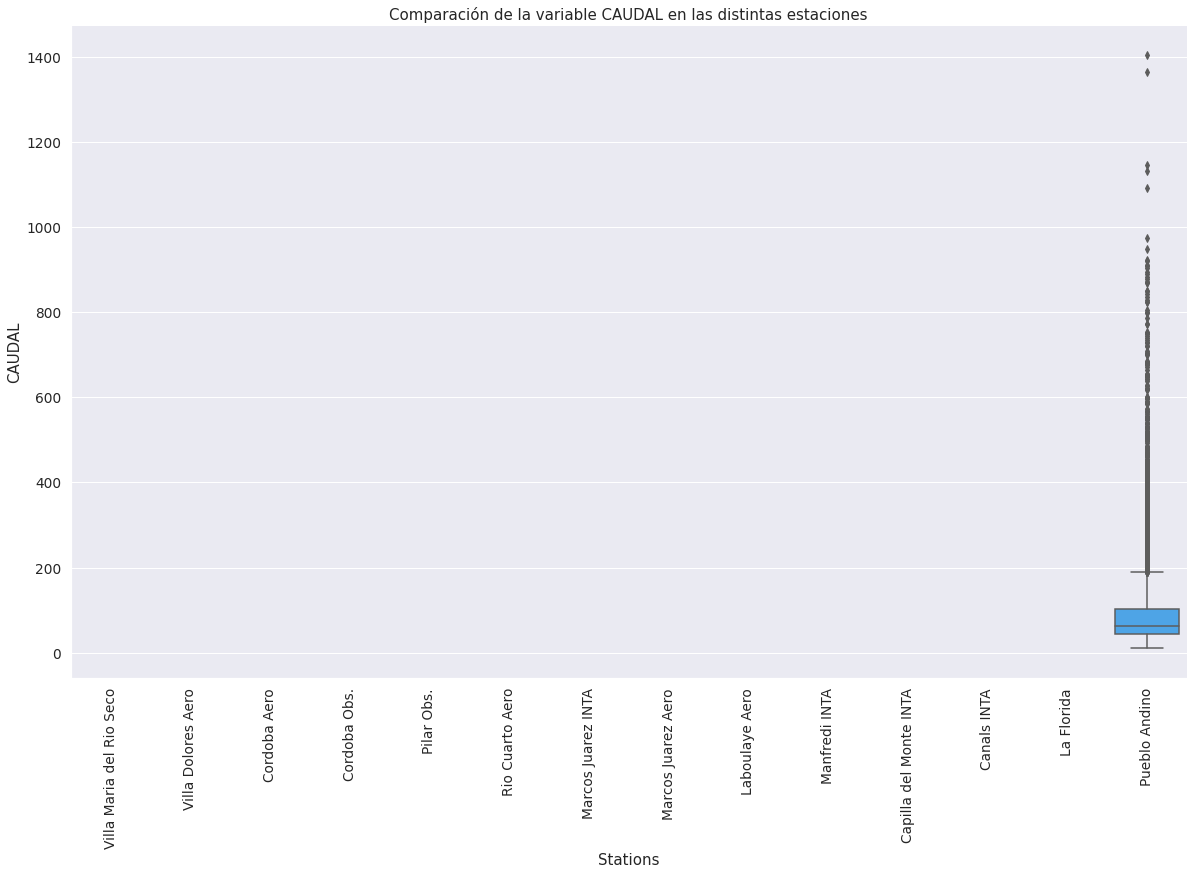

In [ ]:
BLUE = '#35A7FF'
RED = '#FF5964'
GREEN = '#6BF178'
YELLOW = '#FFE74C'

dataset_with_stations = dataset.copy()
dataset_with_stations['station'] = dataset_with_stations['omm_id'].replace(stations)
dataset_with_stations.reset_index(inplace=True)
not_numeric_cols = ['fecha', 'id', 'omm_id', 'station']
numeric_cols = [c for c in dataset_with_stations.columns if c not in not_numeric_cols]
for numeric_col in numeric_cols:
    plt.figure(figsize=(20,12))
    sns.boxplot(data=dataset_with_stations,
                    x='station', y=numeric_col,
                    color=BLUE)
    plt.ylabel(numeric_col.upper())
    plt.xlabel('Stations')
    plt.title(f'Comparación de la variable {numeric_col.upper()} en las distintas estaciones')
    plt.xticks(rotation=90)
    sns.despine()

## 1.2. Análisis del anterior: 
Como se puede observar, las variables que presentan una cantidad significativa de outliers son:

* Húmedad relativa (hr)
* Cobertura nubosa (nub)
* Presión al nivel de la estacion (pres_est)
* Presión al nivel del mar (pres_nm)
* Temperatura de rocío (td)
* Temperatura máxima (tmax)
* Temperatura mínima (tmin)
* Velocidad del viento máxima (vmax_f)
* Velocidad del viento media (vmed)

Por otra parte, se evidencian situaciones particulares en los box plot de algunas variables, a saber:
* Precipitación acumulada (prcp): en la distribucion de esta variable mas del 75% de los valores son 0, lo que produce que el box plot no represente demasiada informacion para esta variable.
* Dirección del viento máximo (vmax_d): está expresada en decenas de grado, por lo cual los datos deberían estar dentro del rango 0 - 36; sin embargo, se presenta un dato con un valor de 100.
* Caudal que escurre por el rio (caudal): existen datos de esta variable sólo para una estación meteorológica y presenta una cantidad significativa de outliers.



## 1.3. Calcular el rango de las variables de cada estación.

In [ ]:
dataset_with_stations = dataset.copy()
dataset_with_stations['station'] = dataset_with_stations['omm_id'].replace(stations)
dataset_with_stations.reset_index(inplace=True)
not_numeric_cols = ['fecha', 'id', 'omm_id', 'station']
numeric_cols = [c for c in dataset_with_stations.columns if c not in not_numeric_cols]

for station in dataset_with_stations['station'].unique():
  subdf = dataset_with_stations.loc[dataset_with_stations['station']==station,:]
  print(f'\nPara la estación <<{station}>>:\n')

  for count, value in enumerate(subdf.columns):
    if value not in not_numeric_cols:
      
      globals()[f'{value}_min'] = round(subdf[value].min(skipna=True),2)
      globals()[f'{value}_max'] = round(subdf[value].max(skipna=True),2)
      globals()[f'{value}_range'] = round(eval(f'{value}_max- {value}_min'),2)
      print(f'Rango para la variable {value} = ',eval(f'{value}_range'))



Para la estación <<Villa Maria del Rio Seco>>:

Rango para la variable helio =  nan
Rango para la variable hr =  82.0
Rango para la variable nub =  8.0
Rango para la variable prcp =  165.0
Rango para la variable pres_est =  58.5
Rango para la variable pres_nm =  49.4
Rango para la variable td =  37.5
Rango para la variable tmax =  39.9
Rango para la variable tmed =  36.3
Rango para la variable tmin =  40.3
Rango para la variable vmax_d =  36.0
Rango para la variable vmax_f =  19.0
Rango para la variable vmed =  11.3
Rango para la variable caudal =  nan

Para la estación <<Villa Dolores Aero>>:

Rango para la variable helio =  14.1
Rango para la variable hr =  88.0
Rango para la variable nub =  8.0
Rango para la variable prcp =  104.0
Rango para la variable pres_est =  42.4
Rango para la variable pres_nm =  50.7
Rango para la variable td =  40.4
Rango para la variable tmax =  41.2
Rango para la variable tmed =  39.8
Rango para la variable tmin =  41.7
Rango para la variable vmax_d =  9

## 2. Agregación de datos
Año hidrológico: 1/agosto al 31/julio
Grupo M10-1:
  1. Acumulen anualmente los datos de *prcp* (Precipitación Total Anual o PTA), y grafique los promedios en función de la elevación de la estación (*elev*).
  2. Determinar la temperatura media diaria anual (TMedDA) de cada estación y determinar si existen tendencias.
  3. ¿Las series de PTA, responden a una distribución Normal?

# Desarrollo:
### 2.1 A partir de la función que define el año hidrológico-> **_1/agosto al 31/julio_**

In [ ]:
def get_hydro_year(date_, start_month=7):
    year = date_.strftime('%Y')
    month = date_.strftime('%m')
    offset = 1 if int(month) >= start_month - 1 else 0
    hydro_year = int(year) + offset - 1
    return hydro_year

### * Se crea un nuevo conjunto de datos, en el se agregaran el nombre de la estación y la elevación correspondiente:

In [ ]:
dataset_with_hydro_year = dataset.copy()
dataset_with_hydro_year.reset_index(inplace=True)
dataset_with_hydro_year['hydro_year'] = dataset_with_hydro_year['fecha'].apply(lambda fecha: get_hydro_year(fecha))
dataset_with_hydro_year['station'] = dataset_with_hydro_year['omm_id'].replace(stations)
dataset_with_hydro_year['station_elev'] = dataset_with_hydro_year['omm_id'].replace(elevs)

### * Luego a partir del año hidrológico, se agrupa la información dada la acumulación anual de los datos de prcp (Precipitación Total Anual o PTA).

In [ ]:
prcp_mean_by_hydro_year_and_station = dataset_with_hydro_year.groupby(['hydro_year', 'omm_id']).sum()\
['prcp'].groupby(['omm_id']).mean()

#Transformo a diccionario de datos key: omm_id y value: prcp/año
prcp_mean_by_hydro_year_and_station_dict = prcp_mean_by_hydro_year_and_station.to_frame().to_dict()
stations_df_prcp_mean = stations_dataset.copy()

stations_df_prcp_mean['prcp_mean'] = stations_dataset['omm_id'].replace(prcp_mean_by_hydro_year_and_station_dict['prcp'])

# Extrayendo un subconjunto con las variables de interés:
stations_df_prcp_mean[['omm_id', 'nombre', 'elev', 'prcp_mean']]

,omm_id,nombre,elev,prcp_mean
0,87244,Villa Maria del Rio Seco,341,786.34
1,87328,Villa Dolores Aero,569,610.99
2,87344,Cordoba Aero,474,835.31
3,87345,Cordoba Obs.,426,786.16
4,87349,Pilar Obs.,338,766.56
5,87466,Marcos Juarez INTA,110,887.98
6,87453,Rio Cuarto Aero,421,826.91
7,87467,Marcos Juarez Aero,114,910.68
8,87534,Laboulaye Aero,137,873.28
9,9987009,Manfredi INTA,292,771.65


Text(0.5, 0, 'Elevación [m.s.n.m.]')

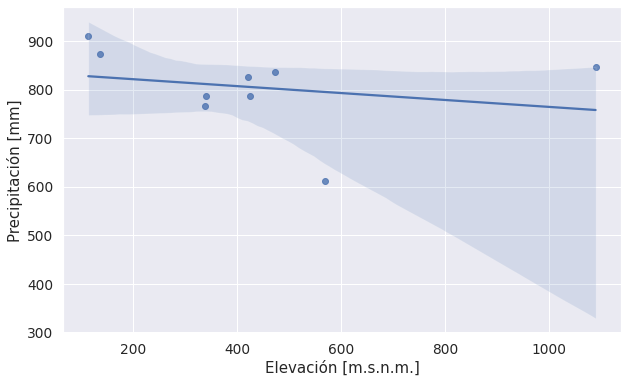

In [ ]:
plt.figure(figsize=(10,6))

ex = ['Pueblo Andino', 'Marcos Juarez INTA', 'Manfredi INTA', 'Capilla del Monte INTA', 'Canals INTA']

stations_df_prcp_mean_filtered = stations_df_prcp_mean[~stations_df_prcp_mean.nombre.isin(ex)]

ax = sns.regplot(x="elev", y="prcp_mean", data=stations_df_prcp_mean_filtered, dropna=True)
plt.ylabel('Precipitación [mm]')
plt.xlabel("Elevación [m.s.n.m.]")

### * Determinando la temperatura media diaria anual (TMedDA) de cada estación y generando el gráfico de tendencias:

In [ ]:
tmed_mean_by_hydro_year_and_station = dataset_with_hydro_year.groupby(['hydro_year', 'omm_id']).mean()\
['tmed'].groupby(['omm_id']).mean()

#Transformo a diccionario de datos key: omm_id y value: tmed/año
tmed_mean_by_hydro_year_and_station_dict = tmed_mean_by_hydro_year_and_station.to_frame().to_dict()
stations_df_tmed_mean = stations_dataset.copy()

stations_df_tmed_mean['tmed_mean'] = stations_dataset['omm_id'].replace(tmed_mean_by_hydro_year_and_station_dict['tmed'])

# Extrayendo un subconjunto con las variables de interés:
stations_df_tmed_mean[['omm_id', 'nombre', 'elev', 'tmed_mean']]

,omm_id,nombre,elev,tmed_mean
0,87244,Villa Maria del Rio Seco,341,19.06
1,87328,Villa Dolores Aero,569,18.75
2,87344,Cordoba Aero,474,17.27
3,87345,Cordoba Obs.,426,18.71
4,87349,Pilar Obs.,338,17.76
5,87466,Marcos Juarez INTA,110,NaN
6,87453,Rio Cuarto Aero,421,16.38
7,87467,Marcos Juarez Aero,114,17.03
8,87534,Laboulaye Aero,137,16.42
9,9987009,Manfredi INTA,292,NaN


Text(0.5, 0, 'Elevación [m.s.n.m.]')

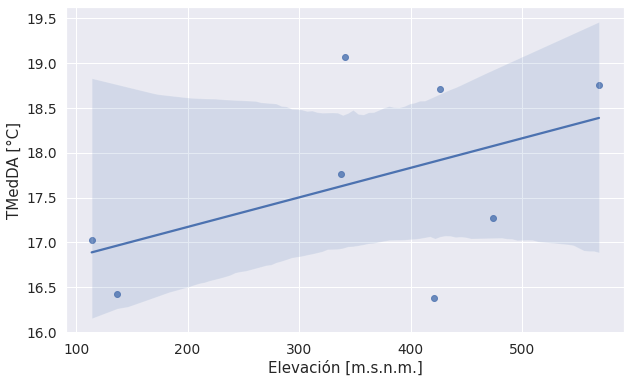

In [ ]:
plt.figure(figsize=(10,6))

ex = ['Pueblo Andino', 'Marcos Juarez INTA', 'Manfredi INTA', 'Capilla del Monte INTA', 'Canals INTA']
stations_df_tmed_mean_filtered = stations_df_tmed_mean[~stations_df_tmed_mean.nombre.isin(ex)]

ax = sns.regplot(x="elev", y="tmed_mean", data=stations_df_tmed_mean_filtered, dropna=True) 
plt.ylabel('TMedDA [°C]')
plt.xlabel("Elevación [m.s.n.m.]")

# En conclusión:
- Dado el conjunto de datos se da que a medida que aumenta la elevación aumenta la temperatura media diaria anual de cada estación.
- Por otra parte se puede mencionar que no hay una tendencia definida entre la precipitación promedio anual para las estaciones en función de la elevación.

# 3. ¿Las series de PTA, responden a una distribución Normal?

Para realizar este punto generamos los gráficos de la PTA, por estación. Para ello se realizaron las siguientes tareas:

### * Agrupo por año hidrológico y código OMM:

In [ ]:
# recordando el diccionario que incluye el label de nombre de la estación:
#plt.figure(figsize=(20,6))
sns.set(rc={'figure.figsize':(20, 6)})
stations = stations_dataset.set_index('omm_id')['nombre'].to_dict()

# Agrupo el conjunto por año hidrológico y omm_id
df2 = dataset_with_hydro_year.groupby(['hydro_year', 'omm_id']).sum()
df2.reset_index(inplace=True)



### * Creamos los histogramas de cada una de las estaciones:

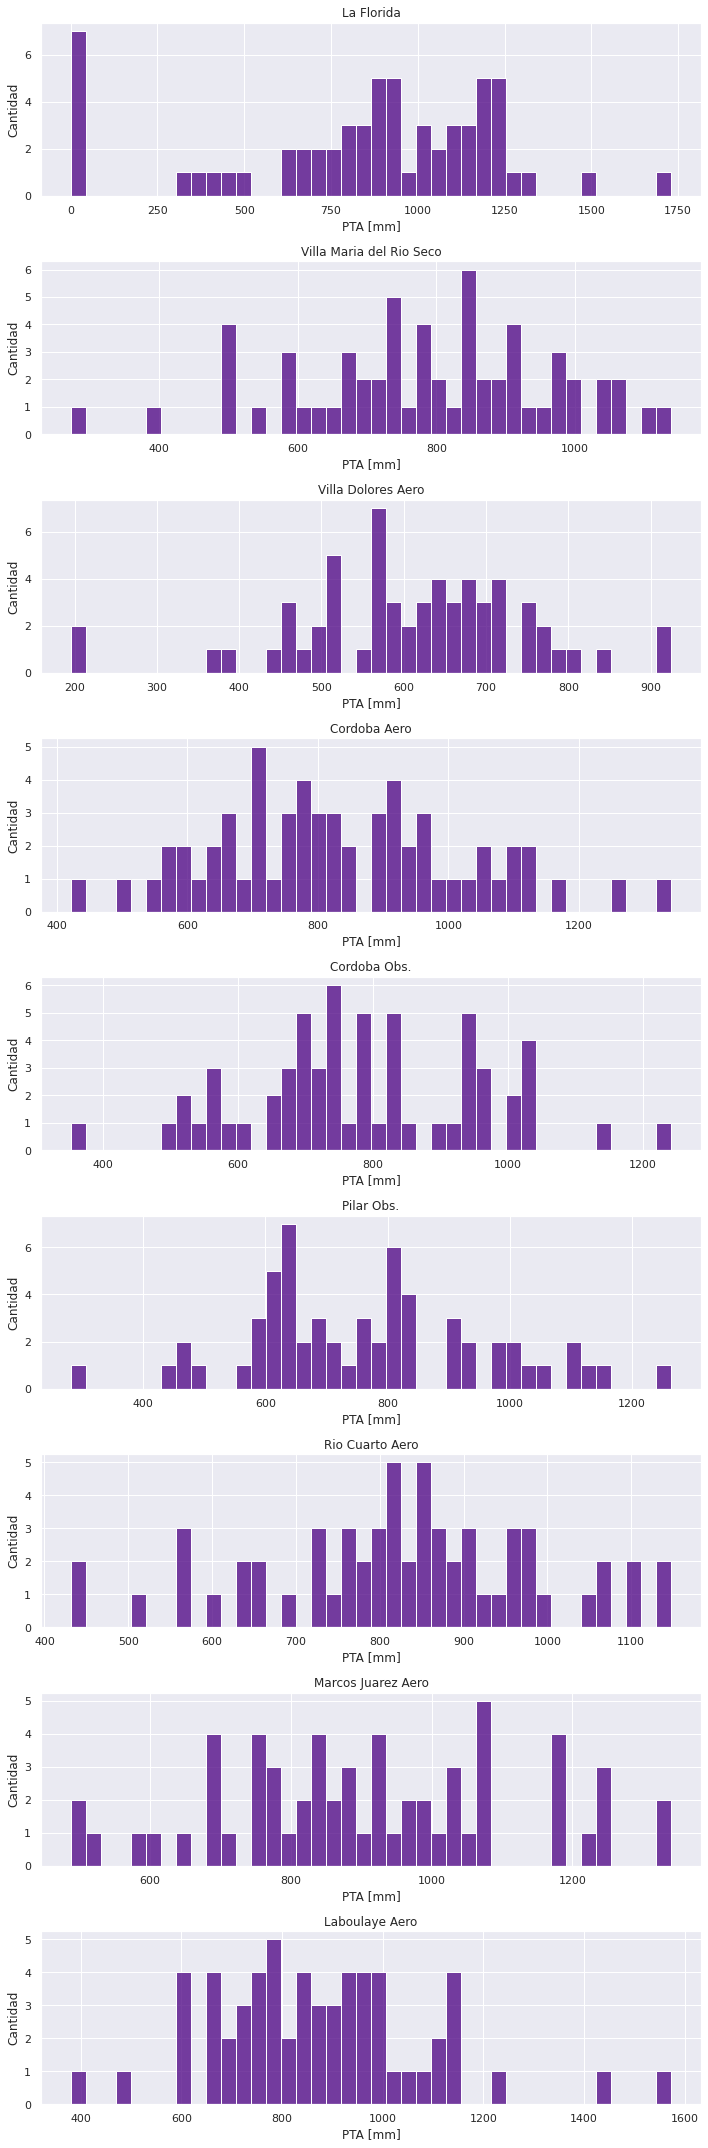

In [ ]:
# Agrego la etiqueta nombre de estación:
df2['n_station'] = df2['omm_id'].replace(stations)
ex = ['Pueblo Andino', 'Marcos Juarez INTA', 'Manfredi INTA', 'Capilla del Monte INTA', 'Canals INTA']
sub_stations = [i for i in df2.n_station.unique() if i not in ex]

fig, axes = plt.subplots(len(sub_stations), 1, figsize=(10,30))
for i, ax in enumerate(axes):
    sub_df = df2.loc[df2['n_station']==sub_stations[i], :]
    sns.histplot(sub_df, x='prcp', bins=40, color = 'indigo', ax=ax).set(title=sub_stations[i],
                                                                xlabel='PTA [mm]', ylabel='Cantidad')

plt.tight_layout()


### * Incorporamos una visualización de los gráficos de linea de cada una de las estaciones para el año hidrológico:

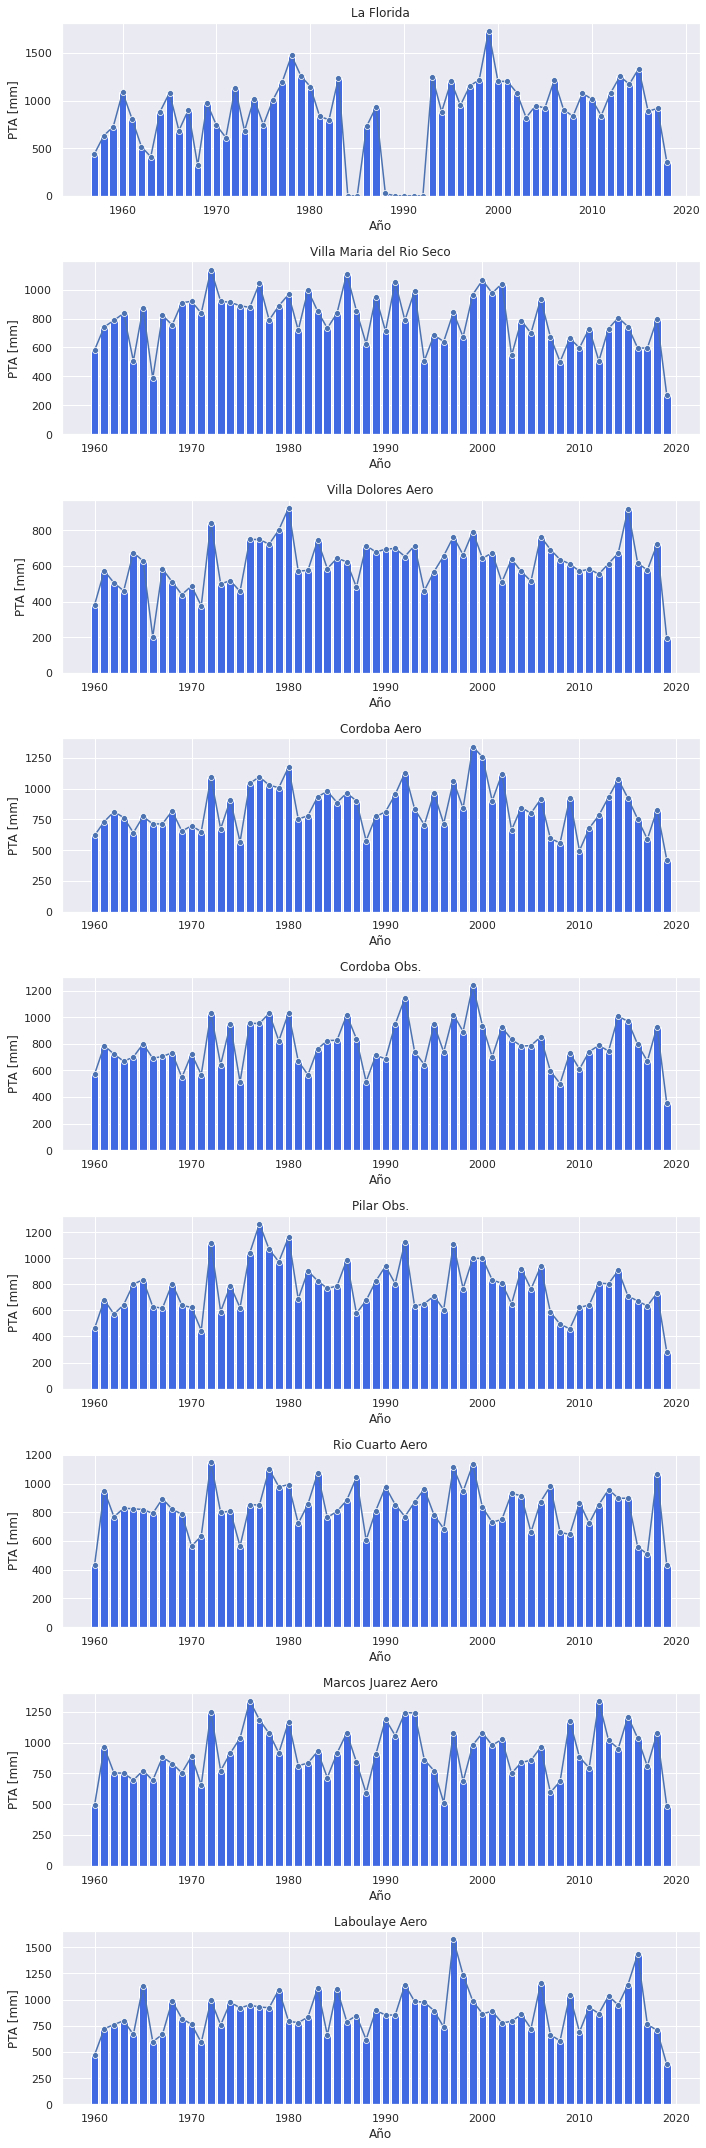

In [ ]:
ex = ['Pueblo Andino', 'Marcos Juarez INTA', 'Manfredi INTA', 'Capilla del Monte INTA', 'Canals INTA']
sub_stations = [i for i in df2.n_station.unique() if i not in ex]
#stations_df_tmed_mean_filtered = stations_df_tmed_mean[~stations_df_tmed_mean.nombre.isin(ex)]

fig, axes = plt.subplots(len(sub_stations), 1, figsize=(10,30))
for i, ax in enumerate(axes):
    sub_df = df2.loc[df2['n_station']==sub_stations[i], :]
    sns.lineplot(x='hydro_year', y='prcp', data=sub_df, ax=ax, sizes=(.25, 2.5),marker='o', linestyle='-')
    ax.bar(sub_df.hydro_year, sub_df.prcp, color = "royalblue")
    ax.set_title(sub_stations[i])
    ax.set_ylabel('PTA [mm]')
    ax.set_xlabel('Año')
plt.tight_layout()

# En Conclusión:
- La PTA no sigue una distribución normal en ninguna de las estaciones estudiadas.